In [1]:
# Import all need library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import urllib3
import json
import math
import folium
import datetime
from datetime import datetime, date, time
path_save='C:\\Users\\anton\\Desktop\\IOD\\Mini project 1'

DEBUG=False


# <center> MINI PROJECT 1 </center>
## <center>by Anton </center>

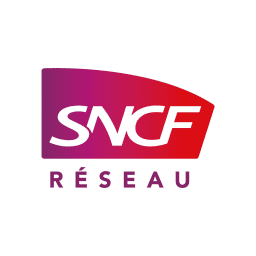

The Société nationale des chemins de fer français is France's national state-owned railway company. 

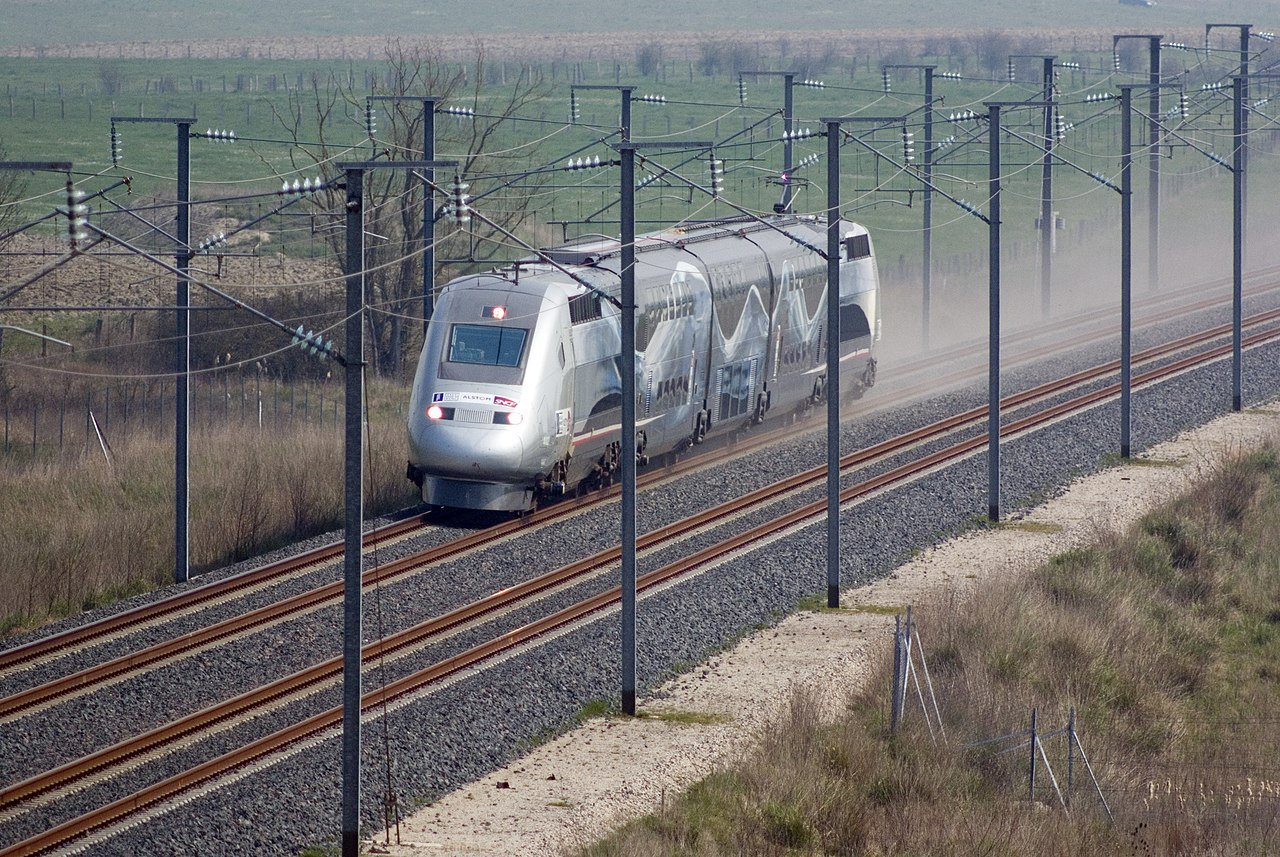

-----------------------------------------------------------------------------------------------

 # - What are the 5 stations with the most of departures/arrivals?
 
 # - What is the daily pattern ?
 
 # - How many trips are disrupted  ? How big ? What was the reason ?

-----------------------------------------------------------------------------------------------

# <center> 1. Sourcing </center>

# 1.1 Navitia API

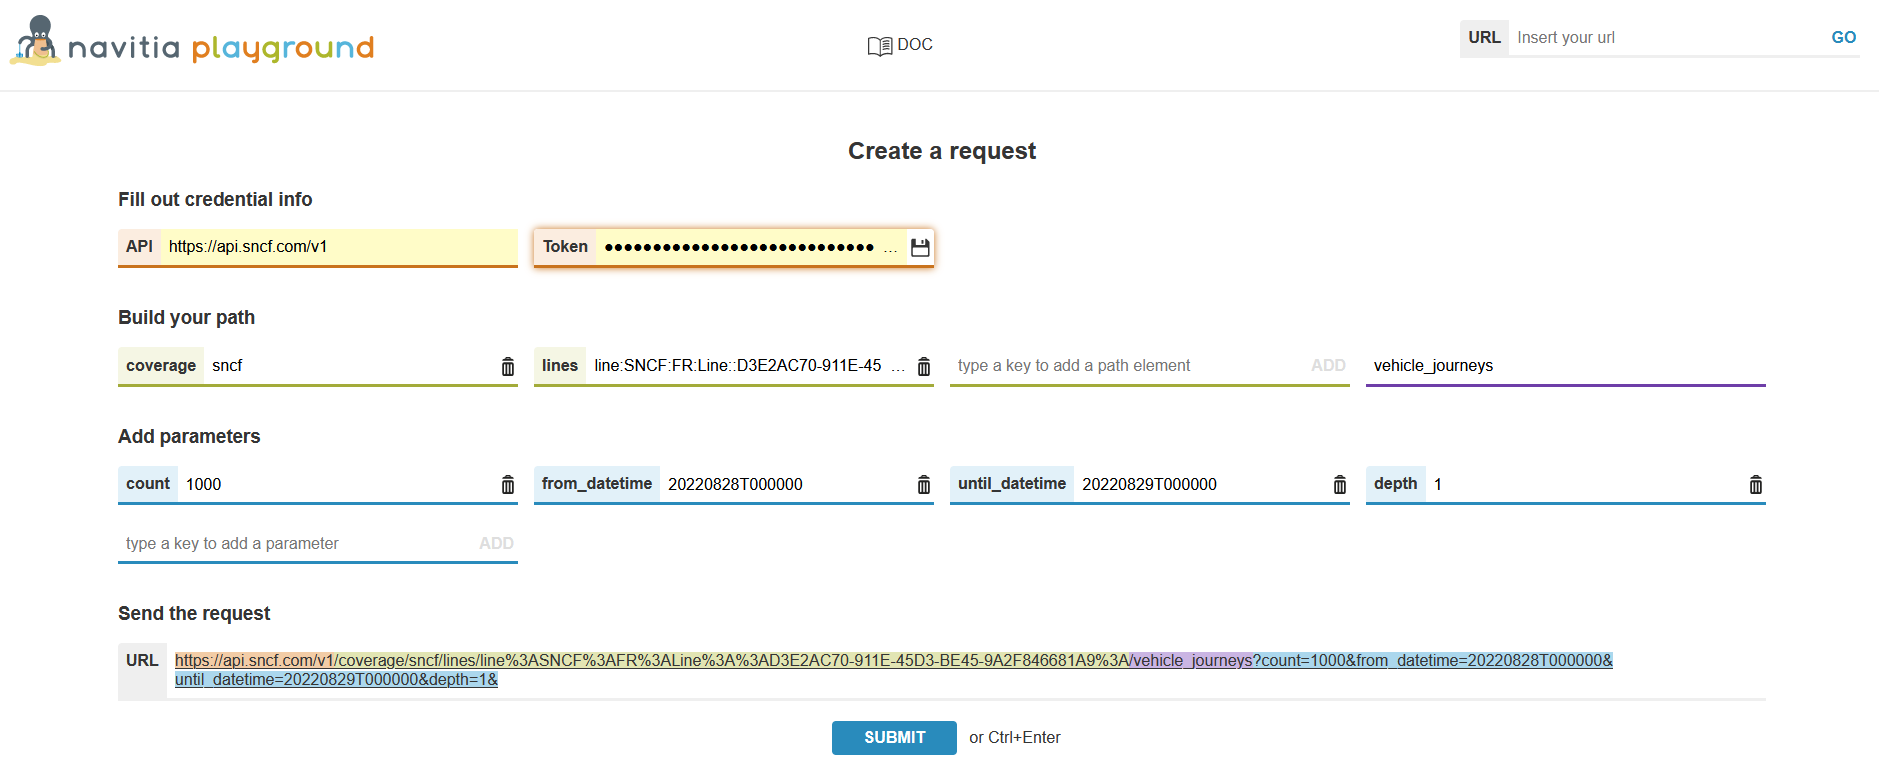

- Navitia Playground : https://playground.navitia.io/
- Navitia Doc :https://doc.navitia.io/#getting-started

# 1.2 Request fonctions

In [2]:
# Fonctions use to extract the data from the API 

def requests_API(index='',parameters=''):
    
    """
    
   Request the API with the key and parameters  
    
    """    

    key='key=300cf7f4-8eb3-45db-a456-654be6013e59'
    url=f"https://api.sncf.com/v1/coverage/sncf/{index}?{parameters}{key}"
    if DEBUG:
        print(url)
        
    response = requests.get(url)
    
    if response.status_code==200:
        return response.json()
    else: 
        return response.status_code
    
def collect_data_pagination(index,parameters=''):
    
    """
    
    Collect the data from the API for all pages of the query
    
    """
    data=pd.DataFrame()

    # Look for the number of page of my response (25 items per page by default but can be up to 1000 thanks to 'count=1000')
    data_pages=requests_API(index=index,parameters=parameters)
    if data_pages['pagination']['total_result']>data_pages['pagination']['items_per_page']:
        nb_pages=math.ceil(data_pages['pagination']['total_result']/data_pages['pagination']['items_per_page'])
        
    if DEBUG:
        print(nb_pages,' pages')

    # Calls the API the number of pages of the response has
    for page in range(0,nb_pages): 
        temp_data=requests_API(index,parameters=f'start_page={page}&{parameters}')
        temp_data=pd.DataFrame.from_dict(temp_data[index])
        data=pd.concat([data,temp_data])
    
    # END For
    
    # Reset the index 
    data.reset_index(inplace=True)
    
    return data

def import_save_df(index,parameters='',import_API=False,save_API=False):
    
    """
    
    Import the query from the API and save it in .json OR import directly from the .json already created
    
    """
    
    if DEBUG:
        print(f"{path_save}\\{index}.json")
    
    if import_API:
        data=collect_data_pagination(index,parameters=parameters)

        if save_API:
            data.to_json(path_or_buf=f"{path_save}\\{index}.json")
    else :
        data=pd.read_json(f"{path_save}\\{index}.json")
    
    return data

-----------------------------------------------------------------------------------------------

# <center> What are the 5 stations with the most of departures/arrivals ? </center>

-----------------------------------------------------------------------------------------------

# Analyze  31/08/2022

## 1. Import table 'vehicle_journeys' from API

In [3]:
data_vehicle_journeys=import_save_df(index='vehicle_journeys',parameters='count=1000&depth=1&since=20220831T000000&until=20220901T000000&',import_API=False,save_API=False)
data_vehicle_journeys.head()

index                                              codes  name  \
0      0  [{'type': 'rt_piv', 'value': '2022-08-31:9580:...  9580   
1      1  [{'type': 'rt_piv', 'value': '2022-08-31:9583:...  9583   
2      2  [{'type': 'rt_piv', 'value': '2022-08-31:9560:...  9560   
3      3  [{'type': 'rt_piv', 'value': '2022-08-31:9561:...  9561   
4      4  [{'type': 'rt_piv', 'value': '2022-08-31:9563:...  9563   

                                     journey_pattern  \
0  {'id': 'journey_pattern:0', 'name': 'journey_p...   
1  {'id': 'journey_pattern:1', 'name': 'journey_p...   
2  {'id': 'journey_pattern:8', 'name': 'journey_p...   
3  {'id': 'journey_pattern:9', 'name': 'journey_p...   
4  {'id': 'journey_pattern:9', 'name': 'journey_p...   

                                         disruptions  \
0  [{'internal': True, 'type': 'disruption', 'id'...   
1  [{'internal': True, 'type': 'disruption', 'id'...   
2  [{'internal': True, 'type': 'disruption', 'id'...   
3  [{'internal': True, 'type': 'disruption', 'id'...   
4                                                 []   

                                           calendars  \
0  [{'active_periods': [{'begin': '20220831', 'en...   
1  [{'active_periods': [{'begin': '20220831', 'en...   
2  [{'active_periods': [{'begin': '20220831', 'en...   
3  [{'active_periods': [{'begin': '20220831', 'en...   
4  [{'active_periods': [{'begin': '20220831', 'en...   

                                          stop_times  \
0  [{'stop_point': {'name': 'Francfort sur le Mai...   
1  [{'stop_point': {'name': 'Marseille Saint-Char...   
2  [{'stop_point': {'name': 'Francfort sur le Mai...   
3  [{'stop_point': {'name': 'Paris Est', 'links':...   
4  [{'stop_point': {'name': 'Paris Est', 'links':...   

                                    validity_pattern headsign  \
0  {'beginning_date': '20220830', 'days': '000000...     9580   
1  {'beginning_date': '20220830', 'days': '000000...     9583   
2  {'beginning_date': '20220830', 'days': '000000...     9560   
3  {'beginning_date': '20220830', 'days': '000000...     9561   
4  {'beginning_date': '20220830', 'days': '000000...     9563   

                                                  id  \
0  vehicle_journey:SNCF:2022-08-31:9580:1187:Long...   
1  vehicle_journey:SNCF:2022-08-31:9583:1187:Long...   
2  vehicle_journey:SNCF:2022-08-31:9560:1187:Long...   
3  vehicle_journey:SNCF:2022-08-31:9561:1187:Long...   
4  vehicle_journey:SNCF:2022-08-31:9563:1187:Long...   

                                                trip  
0  {'id': 'SNCF:2022-08-31:9580:1187:LongDistance...  
1  {'id': 'SNCF:2022-08-31:9583:1187:LongDistance...  
2  {'id': 'SNCF:2022-08-31:9560:1187:LongDistance...  
3  {'id': 'SNCF:2022-08-31:9561:1187:LongDistance...  
4  {'id': 'SNCF:2022-08-31:9563:1187:LongDistance...

In [4]:
data_vehicle_journeys.shape

(17607, 11)

In [5]:
data_vehicle_journeys.columns

Index(['index', 'codes', 'name', 'journey_pattern', 'disruptions', 'calendars',
       'stop_times', 'validity_pattern', 'headsign', 'id', 'trip'],
      dtype='object')

17607 journeys during this day

## 2. Data wrangling

In [6]:
# Drop all column not use for my analyze
data_vehicle_journeys.drop(['index','calendars','name','validity_pattern',
                            'headsign','id','codes','journey_pattern'],axis='columns',inplace=True)

# Extract the commercial mode from the trip column
data_vehicle_journeys['trip']=[i['id'].split(':')[-1] for i in data_vehicle_journeys['trip']]

data_vehicle_journeys.head()

disruptions  \
0  [{'internal': True, 'type': 'disruption', 'id'...   
1  [{'internal': True, 'type': 'disruption', 'id'...   
2  [{'internal': True, 'type': 'disruption', 'id'...   
3  [{'internal': True, 'type': 'disruption', 'id'...   
4                                                 []   

                                          stop_times               trip  
0  [{'stop_point': {'name': 'Francfort sur le Mai...  LongDistanceTrain  
1  [{'stop_point': {'name': 'Marseille Saint-Char...  LongDistanceTrain  
2  [{'stop_point': {'name': 'Francfort sur le Mai...  LongDistanceTrain  
3  [{'stop_point': {'name': 'Paris Est', 'links':...  LongDistanceTrain  
4  [{'stop_point': {'name': 'Paris Est', 'links':...  LongDistanceTrain

In [7]:
start_point, lat_start_point, lon_start_point , departure_time, end_point,\
arrival_time, lat_end_point,lon_end_point, base_duration =[],[],[],[],[],[],[],[],[]
for i in data_vehicle_journeys['stop_times']:

    #Extract informations about the departure point
    start_point.append(i[0]['stop_point']['name'])
    lat_start_point.append(i[0]['stop_point']['coord']['lat'])
    lon_start_point.append(i[0]['stop_point']['coord']['lon'])
    departure_time.append(i[0]['departure_time'])
    
    # Calc the number of stop points for the journey
    nb_stops=len(i)-1
    
    #Extract informations about the end point
    end_point.append(i[nb_stops]['stop_point']['name'])
    lat_end_point.append(i[nb_stops]['stop_point']['coord']['lat'])
    lon_end_point.append(i[nb_stops]['stop_point']['coord']['lon'])
    arrival_time.append(i[nb_stops]['arrival_time'])
    
#END FOR i

# Convert to Datetime
departure_time=pd.to_datetime(departure_time,format='%H%M%S')
arrival_time=pd.to_datetime(arrival_time,format='%H%M%S')

# Compute the duration of each journeys
base_duration=[arrival_time[i]-departure_time[i] for i in range(len(departure_time))]

# Convert Datetime to str to display only the time
departure_time=departure_time.strftime('%H:%M')
arrival_time=arrival_time.strftime('%H:%M')

# DEBUG
#arrival_time

In [8]:
#Insert all these lists in the Dataframe
list_columns=[start_point, lat_start_point, lon_start_point , departure_time, end_point, arrival_time, lat_end_point,lon_end_point, base_duration]
name_columns=['start_point', 'lat_start_point', 'lon_start_point' , 'departure_time', 'end_point', 'arrival_time', 'lat_end_point','lon_end_point', 'base_duration']

for i, column in enumerate(list_columns):
    data_vehicle_journeys[name_columns[i]]=column
    
# Convert the duration in minutes
data_vehicle_journeys['base_duration']=(data_vehicle_journeys['base_duration'] / np.timedelta64(1,'m')).astype(int)

# Drop a columns
data_vehicle_journeys.drop(['stop_times'],axis='columns',inplace=True)

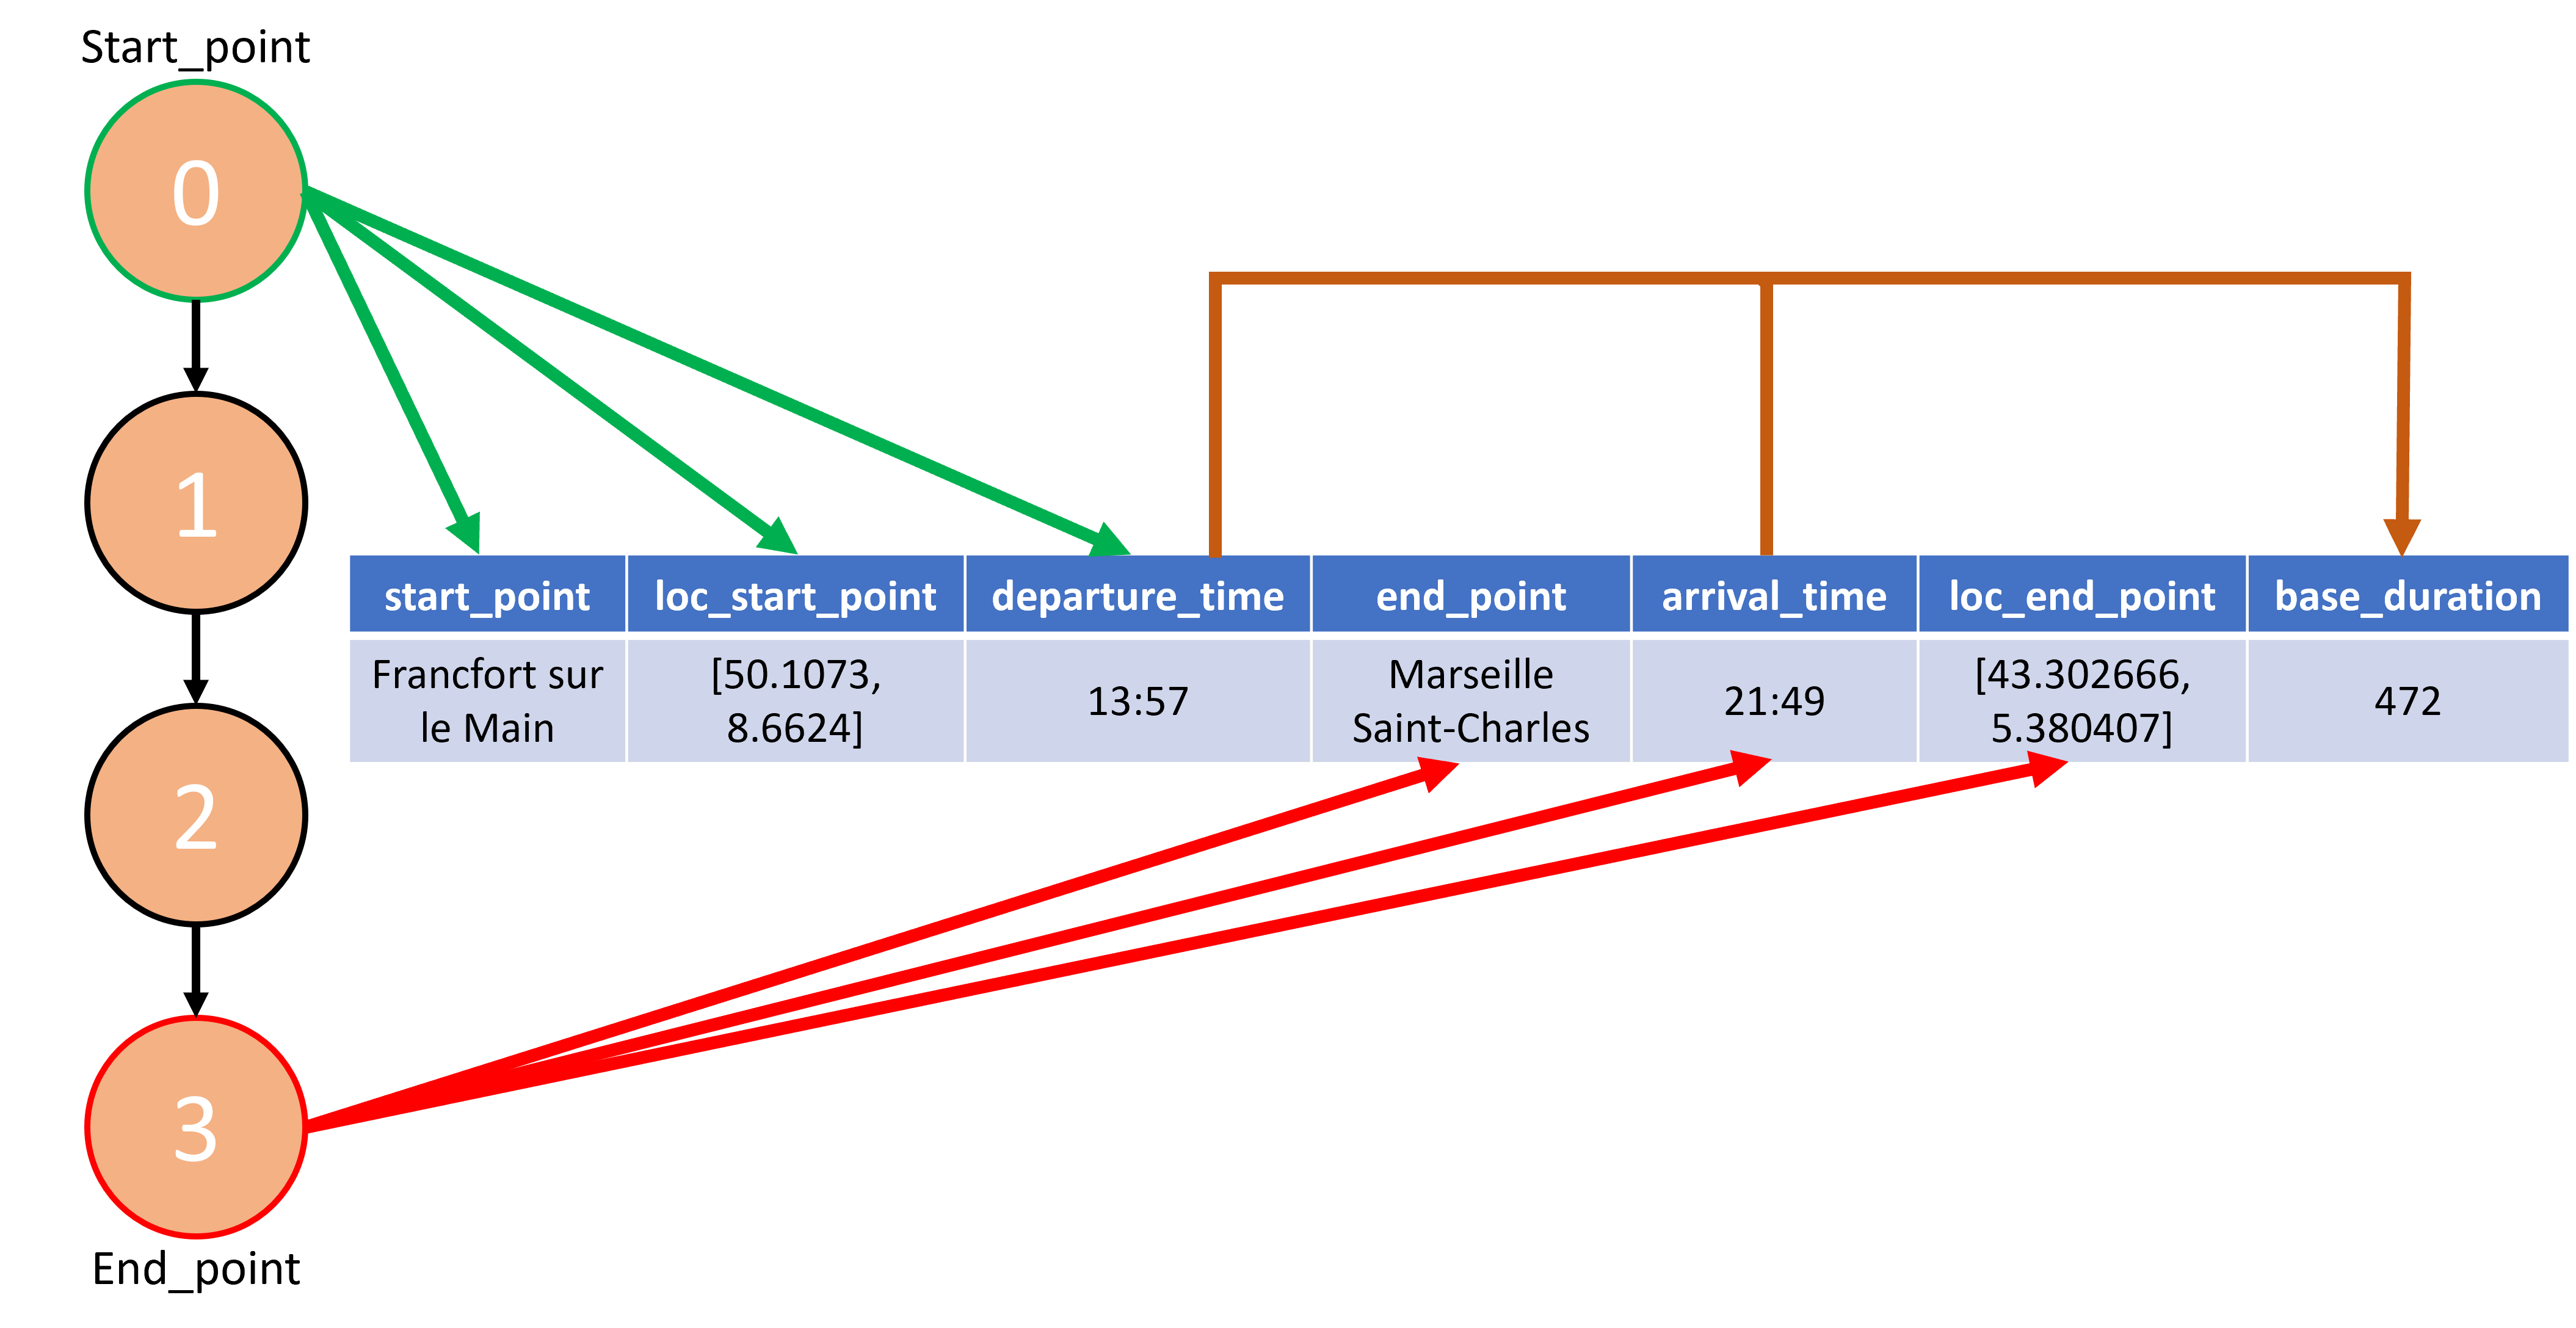

In [9]:
data_vehicle_journeys.head()

disruptions               trip  \
0  [{'internal': True, 'type': 'disruption', 'id'...  LongDistanceTrain   
1  [{'internal': True, 'type': 'disruption', 'id'...  LongDistanceTrain   
2  [{'internal': True, 'type': 'disruption', 'id'...  LongDistanceTrain   
3  [{'internal': True, 'type': 'disruption', 'id'...  LongDistanceTrain   
4                                                 []  LongDistanceTrain   

               start_point lat_start_point lon_start_point departure_time  \
0    Francfort sur le Main         50.1073          8.6624          13:57   
1  Marseille Saint-Charles       43.302666        5.380407          08:10   
2    Francfort sur le Main         50.1073          8.6624          16:56   
3                Paris Est       48.876742        2.358424          07:20   
4                Paris Est       48.876742        2.358424          15:20   

                 end_point arrival_time lat_end_point lon_end_point  \
0  Marseille Saint-Charles        21:49     43.302666      5.380407   
1    Francfort sur le Main        15:58       50.1073        8.6624   
2                Paris Est        20:41     48.876742      2.358424   
3    Francfort sur le Main        10:58       50.1073        8.6624   
4    Francfort sur le Main        18:58       50.1073        8.6624   

   base_duration  
0            472  
1            468  
2            225  
3            218  
4            218

In [10]:
# Check if the journey had some disruption

# List empty (length =0)--> no disruption otherwise disruption (length > 0)
dis=data_vehicle_journeys.disruptions.apply(len)

for i in range(len(data_vehicle_journeys.disruptions)):

    if dis[i]>0:
        # Extract the disruption ID
        data_vehicle_journeys.loc[i,'disruptions']=data_vehicle_journeys.loc[i,'disruptions'][0]['id']
    else:
        data_vehicle_journeys.loc[i,'disruptions']='On time'
        
data_vehicle_journeys.head()

disruptions               trip  \
0  1285cfa4-a24d-41ef-9a53-9cdba6333874  LongDistanceTrain   
1  a2302ebb-11e5-4bfa-a0f9-8a2e1fa4d7bc  LongDistanceTrain   
2  79358dbb-b7b8-4512-9c90-e5c61bd36beb  LongDistanceTrain   
3  beb81a65-0a16-49a8-a83e-249112e6bda0  LongDistanceTrain   
4                               On time  LongDistanceTrain   

               start_point lat_start_point lon_start_point departure_time  \
0    Francfort sur le Main         50.1073          8.6624          13:57   
1  Marseille Saint-Charles       43.302666        5.380407          08:10   
2    Francfort sur le Main         50.1073          8.6624          16:56   
3                Paris Est       48.876742        2.358424          07:20   
4                Paris Est       48.876742        2.358424          15:20   

                 end_point arrival_time lat_end_point lon_end_point  \
0  Marseille Saint-Charles        21:49     43.302666      5.380407   
1    Francfort sur le Main        15:58       50.1073        8.6624   
2                Paris Est        20:41     48.876742      2.358424   
3    Francfort sur le Main        10:58       50.1073        8.6624   
4    Francfort sur le Main        18:58       50.1073        8.6624   

   base_duration  
0            472  
1            468  
2            225  
3            218  
4            218

In [11]:
data_vehicle_journeys.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17607 entries, 0 to 17606
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   disruptions      17607 non-null  object
 1   trip             17607 non-null  object
 2   start_point      17607 non-null  object
 3   lat_start_point  17607 non-null  object
 4   lon_start_point  17607 non-null  object
 5   departure_time   17607 non-null  object
 6   end_point        17607 non-null  object
 7   arrival_time     17607 non-null  object
 8   lat_end_point    17607 non-null  object
 9   lon_end_point    17607 non-null  object
 10  base_duration    17607 non-null  int32 
dtypes: int32(1), object(10)
memory usage: 2.0+ MB


Look for atypical values

In [12]:
data_vehicle_journeys.describe()

base_duration
count   17607.000000
mean       45.897370
std       187.445115
min     -1428.000000
25%        36.000000
50%        57.000000
75%        85.000000
max       626.000000

Some duration are negative (trip overnight) --> change to np.nan

In [13]:
# Replace negative duration with np.nan
data_vehicle_journeys.loc[data_vehicle_journeys['base_duration']<0,'base_duration']=np.nan

In [14]:
data_vehicle_journeys.describe()

base_duration
count   17314.000000
mean       69.281275
std        51.568037
min         1.000000
25%        37.000000
50%        58.000000
75%        86.000000
max       626.000000

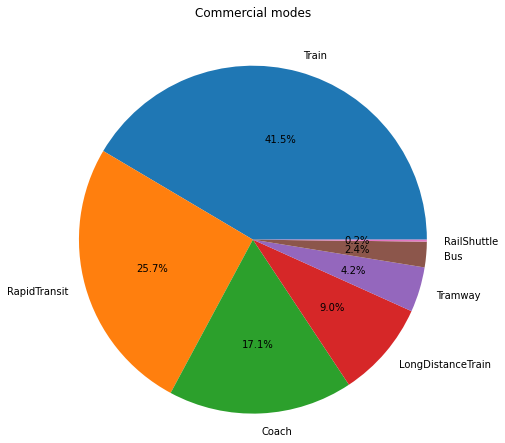

In [15]:
data=dict(data_vehicle_journeys['trip'].value_counts())
names = list(data.keys())
values = list(data.values())
plt.pie(x=values,labels=names,radius=2,autopct='%1.1f%%')
plt.title('Commercial modes',y=1.5)
plt.show()

# <center> What are the 5 stations with the most of departures/arrivals ? </center>

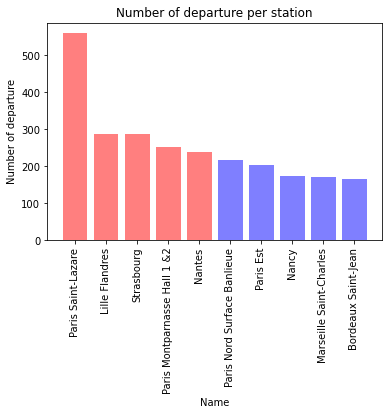

In [16]:
data=dict(data_vehicle_journeys['start_point'].value_counts().head(10))
names = list(data.keys())
values = list(data.values())
color=['r','r','r','r','r','b','b','b','b','b','b']
plt.bar(names,values,color=color,alpha=0.5)
plt.xlabel('Name')
plt.ylabel('Number of departure')
plt.title('Number of departure per station')
plt.xticks(rotation=90)
plt.show()

In [17]:
def plot_hist(df,feature):
    ax = sns.histplot(df[feature],color='g',bins=50)
    plt.title(f'Distribution of {feature}')
    
    # plot a vertical line for population mean and sample mean
    ax.axvline(df[feature].mean(), color='red', linestyle='dashed', lw=1)
    ax.axvline(df[feature].median(), color='blue', linestyle='dashed', lw=1)
    plt.show()
    print('Blue vertical line --> Median')
    print('Red vertical line --> Mean')

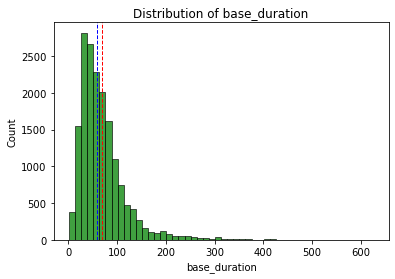

Blue vertical line --> Median
Red vertical line --> Mean
Duration in minutes


In [18]:
plot_hist(data_vehicle_journeys,'base_duration')
print('Duration in minutes')

In [19]:
data_vehicle_journeys['base_duration'].describe()

count    17314.000000
mean        69.281275
std         51.568037
min          1.000000
25%         37.000000
50%         58.000000
75%         86.000000
max        626.000000
Name: base_duration, dtype: float64

Interpretation :
- 50% trips are less than 1 hour
 
 Warning : All commercial modes are include in this histogram 


-----------------------------------------------------------------------------------------------

# <center> What is the daily pattern ? </center>

-----------------------------------------------------------------------------------------------

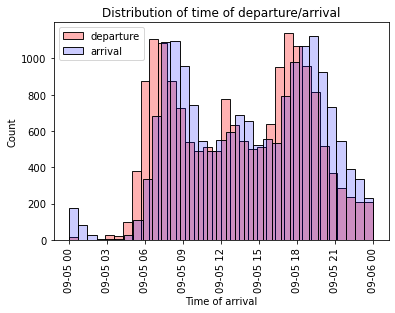

In [20]:
sns.histplot(data_vehicle_journeys['departure_time'].astype('datetime64[ns]'),color='r',alpha=0.3)
sns.histplot(data_vehicle_journeys['arrival_time'].astype('datetime64[ns]'),color='b',alpha=0.2)

plt.legend(['departure','arrival'])
plt.xlabel('Time of arrival')
plt.ylabel('Count')
plt.title('Distribution of time of departure/arrival')
plt.xticks(rotation=90)
plt.show()

Interpretation : 2 big and 1 moderate peaks of departure :

- from 7.00am to 8.30am --> Start of the day (go to work)

- from 12.00pm to 1pm --> Lunch break

- from 4.00pm to 6pm --> End of the day (go back home)

-----------------------------------------------------------------------------------------------

 # <center> How many trips are disrupted  ? How big ? What was the reason ? </center>

-----------------------------------------------------------------------------------------------

Only have the disruption ID on the previous table --> Import table disruptions from API

## 1. Import table 'disruptions' from API

In [21]:
data_disruptions=import_save_df(index='disruptions',parameters='count=1000&',import_API=False,save_API=False)

# DEBUG
data_disruptions.head()

index status                         disruption_id  \
0      0   past  b024f00c-3238-48dd-842e-a440d293d680   
1      1   past  0b1473e9-adf0-48b4-9291-1f3bd7b07d3b   
2      2   past  4338ab18-37d3-4bca-a80d-0425d2c84500   
3      3   past  530e497b-ae2e-4c03-ab34-aeceac04a489   
4      4   past  355cbec7-bc85-4f89-91bf-76298b3c32b6   

                                            severity  \
0  {'color': '#000000', 'priority': 42, 'name': '...   
1  {'color': '#000000', 'priority': 42, 'name': '...   
2  {'color': '#000000', 'priority': 42, 'name': '...   
3  {'color': '#000000', 'priority': 42, 'name': '...   
4  {'color': '#000000', 'priority': 42, 'name': '...   

                              impact_id  \
0  b024f00c-3238-48dd-842e-a440d293d680   
1  0b1473e9-adf0-48b4-9291-1f3bd7b07d3b   
2  4338ab18-37d3-4bca-a80d-0425d2c84500   
3  530e497b-ae2e-4c03-ab34-aeceac04a489   
4  355cbec7-bc85-4f89-91bf-76298b3c32b6   

                                 application_periods  \
0  [{'begin': '20220831T193500', 'end': '20220831...   
1  [{'begin': '20220831T075500', 'end': '20220831...   
2  [{'begin': '20220831T181900', 'end': '20220831...   
3  [{'begin': '20220831T193500', 'end': '20220831...   
4  [{'begin': '20220831T132400', 'end': '20220831...   

                                            messages          updated_at  \
0  [{'text': 'Régulation du trafic', 'channel': {... 2022-09-01 10:05:15   
1  [{'text': 'Travaux sur les voies', 'channel': ... 2022-09-01 10:05:15   
2                                               None 2022-09-01 10:05:15   
3  [{'text': 'Incident sur un réseau ferré étrang... 2022-09-01 10:05:15   
4  [{'text': 'Défaillance de matériel', 'channel'... 2022-09-01 10:05:15   

                                    uri  \
0  b024f00c-3238-48dd-842e-a440d293d680   
1  0b1473e9-adf0-48b4-9291-1f3bd7b07d3b   
2  4338ab18-37d3-4bca-a80d-0425d2c84500   
3  530e497b-ae2e-4c03-ab34-aeceac04a489   
4  355cbec7-bc85-4f89-91bf-76298b3c32b6   

                                    impacted_objects  \
0  [{'impacted_stops': [{'amended_arrival_time': ...   
1  [{'pt_object': {'embedded_type': 'trip', 'id':...   
2  [{'impacted_stops': [{'amended_arrival_time': ...   
3  [{'impacted_stops': [{'amended_arrival_time': ...   
4  [{'impacted_stops': [{'amended_arrival_time': ...   

                         disruption_uri        contributor cause  \
0  b024f00c-3238-48dd-842e-a440d293d680  realtime.sncf.piv         
1  0b1473e9-adf0-48b4-9291-1f3bd7b07d3b  realtime.sncf.piv         
2  4338ab18-37d3-4bca-a80d-0425d2c84500  realtime.sncf.piv         
3  530e497b-ae2e-4c03-ab34-aeceac04a489  realtime.sncf.piv         
4  355cbec7-bc85-4f89-91bf-76298b3c32b6  realtime.sncf.piv         

                                     id  
0  b024f00c-3238-48dd-842e-a440d293d680  
1  0b1473e9-adf0-48b4-9291-1f3bd7b07d3b  
2  4338ab18-37d3-4bca-a80d-0425d2c84500  
3  530e497b-ae2e-4c03-ab34-aeceac04a489  
4  355cbec7-bc85-4f89-91bf-76298b3c32b6

In [22]:
data_disruptions.shape

(3333, 14)

## 2. Data wrangling

In [23]:
# Droppping all useless columns
data_disruptions.drop(['index','cause','disruption_uri','impact_id','id','status','updated_at',\
                       'contributor','messages','uri'],axis='columns',inplace=True)
# Setting index
data_disruptions.set_index('disruption_id',inplace=True)

#DEBUG
#data_disruptions.head()

In [24]:
data_disruptions['severity']=[i['name']for i in data_disruptions['severity']]
data_disruptions['datetime_disruption']=[i[0]['begin'] for i in data_disruptions['application_periods']]
data_disruptions['datetime_disruption']=pd.to_datetime(data_disruptions['datetime_disruption'])
data_disruptions.drop('application_periods',axis='columns',inplace=True)

date_start='2022-08-31'
date_end='2022-09-01'

data_disruptions=data_disruptions.loc[(data_disruptions['datetime_disruption']>=date_start) 
                     & (data_disruptions['datetime_disruption']<date_end),:]
#DEBUG
data_disruptions.head()

severity  \
disruption_id                                         
b024f00c-3238-48dd-842e-a440d293d680   trip delayed   
0b1473e9-adf0-48b4-9291-1f3bd7b07d3b  trip canceled   
4338ab18-37d3-4bca-a80d-0425d2c84500   trip delayed   
530e497b-ae2e-4c03-ab34-aeceac04a489   trip delayed   
355cbec7-bc85-4f89-91bf-76298b3c32b6   trip delayed   

                                                                       impacted_objects  \
disruption_id                                                                             
b024f00c-3238-48dd-842e-a440d293d680  [{'impacted_stops': [{'amended_arrival_time': ...   
0b1473e9-adf0-48b4-9291-1f3bd7b07d3b  [{'pt_object': {'embedded_type': 'trip', 'id':...   
4338ab18-37d3-4bca-a80d-0425d2c84500  [{'impacted_stops': [{'amended_arrival_time': ...   
530e497b-ae2e-4c03-ab34-aeceac04a489  [{'impacted_stops': [{'amended_arrival_time': ...   
355cbec7-bc85-4f89-91bf-76298b3c32b6  [{'impacted_stops': [{'amended_arrival_time': ...   

                                     datetime_disruption  
disruption_id                                             
b024f00c-3238-48dd-842e-a440d293d680 2022-08-31 19:35:00  
0b1473e9-adf0-48b4-9291-1f3bd7b07d3b 2022-08-31 07:55:00  
4338ab18-37d3-4bca-a80d-0425d2c84500 2022-08-31 18:19:00  
530e497b-ae2e-4c03-ab34-aeceac04a489 2022-08-31 19:35:00  
355cbec7-bc85-4f89-91bf-76298b3c32b6 2022-08-31 13:24:00

In [25]:
#Init lists
amended_arrival , cause = [],[]

for i in data_disruptions.loc[data_disruptions['severity']=='trip delayed','impacted_objects']:
    
    nb_stops=len(i[0]['impacted_stops'])
    amended_arrival.append(i[0]['impacted_stops'][nb_stops-1]['amended_arrival_time'])
    cause.append(i[0]['impacted_stops'][nb_stops-1]['cause'])
    
#END for loop
amended_arrival=pd.to_datetime(amended_arrival,format='%H%M%S')
amended_arrival=amended_arrival.strftime('%H:%M')
# DEBUG
# print(amended_arrival)

In [26]:
list_columns=[amended_arrival, cause]
name_columns=['amended_arrival', 'cause']

for i, column in enumerate(list_columns):
    data_disruptions.loc[data_disruptions['severity']=='trip delayed',name_columns[i]]=column

data_disruptions.drop(['impacted_objects','datetime_disruption'],axis='columns',inplace=True)

    
data_disruptions.head()

severity amended_arrival  \
disruption_id                                                         
b024f00c-3238-48dd-842e-a440d293d680   trip delayed           20:30   
0b1473e9-adf0-48b4-9291-1f3bd7b07d3b  trip canceled             NaN   
4338ab18-37d3-4bca-a80d-0425d2c84500   trip delayed           21:37   
530e497b-ae2e-4c03-ab34-aeceac04a489   trip delayed           20:31   
355cbec7-bc85-4f89-91bf-76298b3c32b6   trip delayed           14:44   

                                                                      cause  
disruption_id                                                                
b024f00c-3238-48dd-842e-a440d293d680                   Régulation du trafic  
0b1473e9-adf0-48b4-9291-1f3bd7b07d3b                                    NaN  
4338ab18-37d3-4bca-a80d-0425d2c84500                                         
530e497b-ae2e-4c03-ab34-aeceac04a489  Incident sur un réseau ferré étranger  
355cbec7-bc85-4f89-91bf-76298b3c32b6                Défaillance de matériel

## 3. Data merging

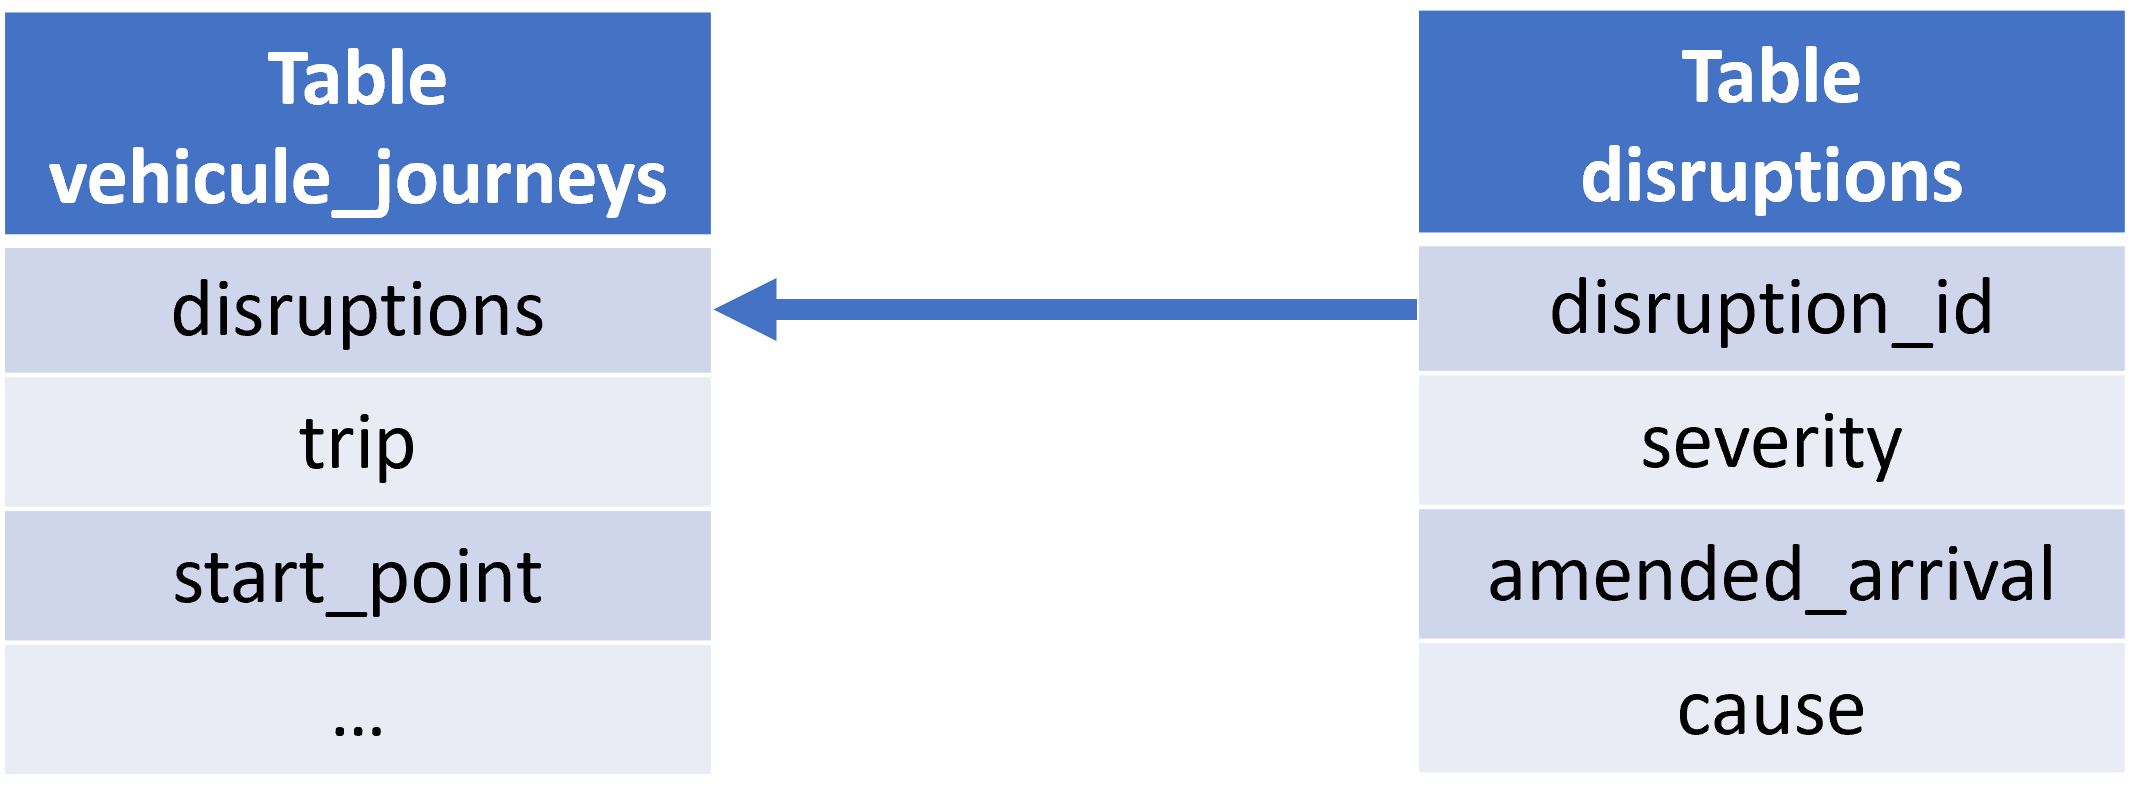

In [27]:
final_data=pd.merge(data_vehicle_journeys,data_disruptions,left_on='disruptions',right_index=True,how='left')
final_data.drop(['disruptions'],axis='columns',inplace=True)

final_data.head()

trip              start_point lat_start_point lon_start_point  \
0  LongDistanceTrain    Francfort sur le Main         50.1073          8.6624   
1  LongDistanceTrain  Marseille Saint-Charles       43.302666        5.380407   
2  LongDistanceTrain    Francfort sur le Main         50.1073          8.6624   
3  LongDistanceTrain                Paris Est       48.876742        2.358424   
4  LongDistanceTrain                Paris Est       48.876742        2.358424   

  departure_time                end_point arrival_time lat_end_point  \
0          13:57  Marseille Saint-Charles        21:49     43.302666   
1          08:10    Francfort sur le Main        15:58       50.1073   
2          16:56                Paris Est        20:41     48.876742   
3          07:20    Francfort sur le Main        10:58       50.1073   
4          15:20    Francfort sur le Main        18:58       50.1073   

  lon_end_point  base_duration      severity amended_arrival  \
0      5.380407          472.0  trip delayed           22:04   
1        8.6624          468.0  trip delayed           16:03   
2      2.358424          225.0  trip delayed           20:56   
3        8.6624          218.0  trip delayed           11:48   
4        8.6624          218.0           NaN             NaN   

                                   cause  
0  Incident sur un réseau ferré étranger  
1                   Régulation du trafic  
2                 Panne de signalisation  
3                Défaillance de matériel  
4                                    NaN

-----------------------------------------------------------------------------------------------

In [28]:
final_data['delays']=final_data['amended_arrival'].astype('datetime64[ns]')-final_data['arrival_time'].astype('datetime64[ns]')
final_data.loc[~final_data['delays'].isna(),'delays']=(final_data.loc[~final_data['delays'].isna(),'delays'] / np.timedelta64(1,'m')).astype(int)

final_data['severity']=final_data['severity'].fillna('No disruptions')
final_data['delays']=final_data['delays'].fillna(np.nan)
final_data.to_csv(path_or_buf=f"{path_save}\\SNCF.csv")
final_data.head()

trip              start_point lat_start_point lon_start_point  \
0  LongDistanceTrain    Francfort sur le Main         50.1073          8.6624   
1  LongDistanceTrain  Marseille Saint-Charles       43.302666        5.380407   
2  LongDistanceTrain    Francfort sur le Main         50.1073          8.6624   
3  LongDistanceTrain                Paris Est       48.876742        2.358424   
4  LongDistanceTrain                Paris Est       48.876742        2.358424   

  departure_time                end_point arrival_time lat_end_point  \
0          13:57  Marseille Saint-Charles        21:49     43.302666   
1          08:10    Francfort sur le Main        15:58       50.1073   
2          16:56                Paris Est        20:41     48.876742   
3          07:20    Francfort sur le Main        10:58       50.1073   
4          15:20    Francfort sur le Main        18:58       50.1073   

  lon_end_point  base_duration        severity amended_arrival  \
0      5.380407          472.0    trip delayed           22:04   
1        8.6624          468.0    trip delayed           16:03   
2      2.358424          225.0    trip delayed           20:56   
3        8.6624          218.0    trip delayed           11:48   
4        8.6624          218.0  No disruptions             NaN   

                                   cause  delays  
0  Incident sur un réseau ferré étranger    15.0  
1                   Régulation du trafic     5.0  
2                 Panne de signalisation    15.0  
3                Défaillance de matériel    50.0  
4                                    NaN     NaN

-----------------------------------------------------------------------------------------------

In [29]:
final_data.describe(include='all')

trip         start_point lat_start_point lon_start_point  \
count   17607               17607           17607           17607   
unique      7                 889             887             887   
top     Train  Paris Saint-Lazare       48.876242        2.325331   
freq     7305                 560             560             560   
mean      NaN                 NaN             NaN             NaN   
std       NaN                 NaN             NaN             NaN   
min       NaN                 NaN             NaN             NaN   
25%       NaN                 NaN             NaN             NaN   
50%       NaN                 NaN             NaN             NaN   
75%       NaN                 NaN             NaN             NaN   
max       NaN                 NaN             NaN             NaN   

       departure_time           end_point arrival_time lat_end_point  \
count           17607               17607        17607         17607   
unique           1217                 880         1258           878   
top             17:10  Paris Saint-Lazare        08:40     48.876242   
freq               58                 578           45           578   
mean              NaN                 NaN          NaN           NaN   
std               NaN                 NaN          NaN           NaN   
min               NaN                 NaN          NaN           NaN   
25%               NaN                 NaN          NaN           NaN   
50%               NaN                 NaN          NaN           NaN   
75%               NaN                 NaN          NaN           NaN   
max               NaN                 NaN          NaN           NaN   

       lon_end_point  base_duration        severity amended_arrival  \
count          17607   17314.000000           17607             760   
unique           878            NaN               7             522   
top         2.325331            NaN  No disruptions           17:38   
freq             578            NaN           16417               6   
mean             NaN      69.281275             NaN             NaN   
std              NaN      51.568037             NaN             NaN   
min              NaN       1.000000             NaN             NaN   
25%              NaN      37.000000             NaN             NaN   
50%              NaN      58.000000             NaN             NaN   
75%              NaN      86.000000             NaN             NaN   
max              NaN     626.000000             NaN             NaN   

                       cause      delays  
count                    760  760.000000  
unique                    31         NaN  
top     Régulation du trafic         NaN  
freq                     206         NaN  
mean                     NaN   10.151316  
std                      NaN   11.249804  
min                      NaN    5.000000  
25%                      NaN    5.000000  
50%                      NaN    5.000000  
75%                      NaN   10.000000  
max                      NaN  130.000000

-----------------------------------------------------------------------------------------------

 # <center> How many trips are disrupted  ?  </center>

-----------------------------------------------------------------------------------------------

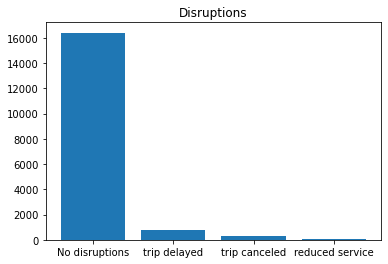

In [30]:
data=dict(final_data['severity'].value_counts().head(4))
names = list(data.keys())
values = list(data.values())
plt.bar(height=values,x=names)
plt.title('Disruptions')
plt.show()

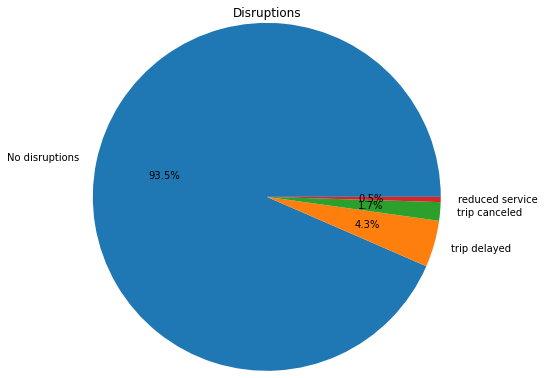

In [31]:
plt.pie(x=values,labels=names,radius=2,autopct='%1.1f%%')
plt.title('Disruptions',y=1.3)
plt.show()

-----------------------------------------------------------------------------------------------

 # <center> How big are the delays ? </center>

-----------------------------------------------------------------------------------------------

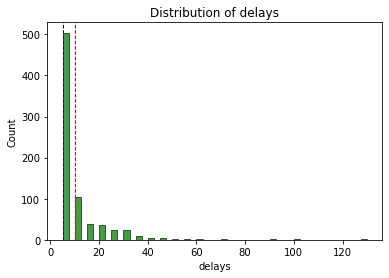

Blue vertical line --> Median
Red vertical line --> Mean


In [32]:
plot_hist(final_data,'delays')
#plt.xscale('log')
plt.show()

In [33]:
final_data['delays'].describe()

count    760.000000
mean      10.151316
std       11.249804
min        5.000000
25%        5.000000
50%        5.000000
75%       10.000000
max      130.000000
Name: delays, dtype: float64

Interpretation : more than 1 delayed journey over 2 have a delay of 5 minutes

In [34]:
np.sum(final_data['delays'])/60/24

5.357638888888889

FUN FACT --> If we sum all the delays, it would be more than 5 days of delays for 1 day of analyze

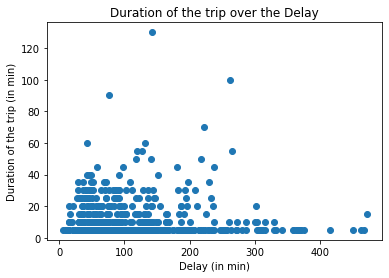

In [35]:
plt.scatter(final_data['base_duration'],final_data['delays'])
plt.xlabel('Delay (in min)')
plt.ylabel('Duration of the trip (in min)')
plt.title('Duration of the trip over the Delay')
plt.show()

In [36]:
final_data.corr()

base_duration   delays
base_duration        1.00000  0.03883
delays               0.03883  1.00000

Interpretation: There no correlation between the delays and the duration of the journey

-----------------------------------------------------------------------------------------------

 # <center> What was the reason of the delay ? </center>

-----------------------------------------------------------------------------------------------

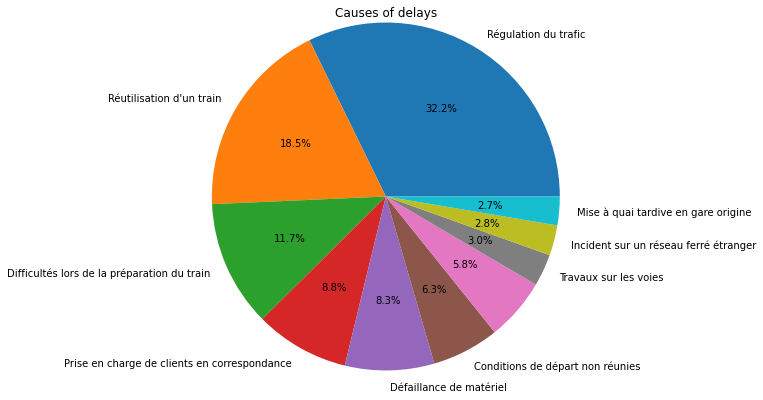

In [37]:
data=dict(final_data['cause'].value_counts().head(10))
names = list(data.keys())
values = list(data.values())
plt.pie(x=values,labels=names,radius=2,autopct='%1.1f%%')
plt.title('Causes of delays',y=1.3)
plt.show()

 # <center> Tableau </center>

Tableau : https://public.tableau.com/app/profile/antonin.stuber/viz/SNCF_16622673378550

 # <center> Conclusion </center>

- 17,000+ trips everyday
- 6.5% of disruptions rate
- if delayed --> mostly 5 min late
- Tableau is really powerfull

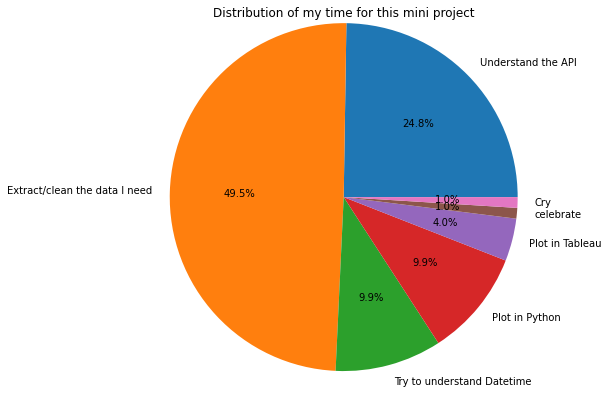

In [38]:
names=['Understand the API','Extract/clean the data I need','Try to understand Datetime','Plot in Python','Plot in Tableau','celebrate','Cry']
values=[25,50,10,10,4,1,1]
plt.pie(x=values,labels=names,radius=2,autopct='%1.1f%%')
plt.title('Distribution of my time for this mini project',y=1.3)
plt.show()

------------------------------------------------------------------------------------------------------------------

 # <center> -- QUESTIONS ? -- </center>

 # <center> -- THE END -- </center>

------------------------------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------------------------------

# Stop points

In [39]:
index='stop_points'
data_trains_stations=import_save_df(index,import_API=False,save_API=False)

In [40]:
data_trains_stations.head()

index                              name links  \
0      0                            Achiet    []   
1      1  Adamswiller Lotissement la Forêt    []   
2      2                Adamswiller Mairie    []   
3      3               Aérogare Orly Ouest    []   
4      4                 Aérogare Orly Sud    []   

                                     coord  \
0  {'lat': '50.131919', 'lon': '2.780112'}   
1  {'lat': '48.905635', 'lon': '7.208238'}   
2  {'lat': '48.903835', 'lon': '7.201179'}   
3  {'lat': '48.728337', 'lon': '2.359676'}   
4  {'lat': '48.728829', 'lon': '2.369614'}   

                                            label equipments  \
0                        Achiet (Achiet-le-Grand)         []   
1  Adamswiller Lotissement la Forêt (Adamswiller)         []   
2                Adamswiller Mairie (Adamswiller)         []   
3       Aérogare Orly Ouest (Paray-Vieille-Poste)         []   
4         Aérogare Orly Sud (Paray-Vieille-Poste)         []   

                              administrative_regions  \
0  [{'insee': '62005', 'name': 'Achiet-le-Grand',...   
1  [{'insee': '67002', 'name': 'Adamswiller', 'le...   
2  [{'insee': '67002', 'name': 'Adamswiller', 'le...   
3  [{'insee': '91479', 'name': 'Paray-Vieille-Pos...   
4  [{'insee': '91479', 'name': 'Paray-Vieille-Pos...   

                               id  \
0  stop_point:SNCF:87342048:Train   
1  stop_point:SNCF:87658856:Coach   
2  stop_point:SNCF:87658922:Coach   
3    stop_point:SNCF:87495713:Bus   
4    stop_point:SNCF:87523548:Bus   

                                           stop_area  
0  {'codes': [{'type': 'source', 'value': '873420...  
1  {'codes': [{'type': 'source', 'value': '876588...  
2  {'codes': [{'type': 'source', 'value': '876589...  
3  {'codes': [{'type': 'source', 'value': '874957...  
4  {'codes': [{'type': 'source', 'value': '875235...

In [41]:
# Split the coord column into 2 columns : Latitude and Longitude
data_trains_stations['latitude']=[loc['lat'] for loc in data_trains_stations['coord']]
data_trains_stations['longitude']=[loc['lon'] for loc in data_trains_stations['coord']]

data_trains_stations['commercial_mode']=[l.split(':')[-1] for l in list(data_trains_stations['id'])]

# Set the index with the id of the train station
data_trains_stations.set_index('id',inplace=True)

In [42]:
#Drop all useless colunms for my analyze
data_trains_stations.drop(['stop_area','links','coord','equipments','administrative_regions','label','index'],axis='columns',inplace=True)

In [43]:
data_trains_stations.head()

name   latitude  \
id                                                                            
stop_point:SNCF:87342048:Train                            Achiet  50.131919   
stop_point:SNCF:87658856:Coach  Adamswiller Lotissement la Forêt  48.905635   
stop_point:SNCF:87658922:Coach                Adamswiller Mairie  48.903835   
stop_point:SNCF:87495713:Bus                 Aérogare Orly Ouest  48.728337   
stop_point:SNCF:87523548:Bus                   Aérogare Orly Sud  48.728829   

                               longitude commercial_mode  
id                                                        
stop_point:SNCF:87342048:Train  2.780112           Train  
stop_point:SNCF:87658856:Coach  7.208238           Coach  
stop_point:SNCF:87658922:Coach  7.201179           Coach  
stop_point:SNCF:87495713:Bus    2.359676             Bus  
stop_point:SNCF:87523548:Bus    2.369614             Bus

In [44]:
data_trains_stations['commercial_mode'].value_counts()

Coach                2840
Train                2323
LongDistanceTrain     755
Bus                   525
RapidTransit          456
Tramway                86
RailShuttle             2
Name: commercial_mode, dtype: int64

In [45]:
france_map = folium.Map(location = [47, 2.78], zoom_start = 6)
for i in range(len(data_trains_stations)):
    location=(data_trains_stations['latitude'][i],data_trains_stations['longitude'][i])
    folium.Circle(location = location,radius=100).add_to(france_map)
france_map

#folium.polyline()
#folium.LayerControl().add_to(france_map)